RANDOM FOREST

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
527 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Pyt

Best parameters found:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 124}
Best Accuracy score achieved:  0.74375
Confusion Matrix:
 [[27  0  2  3  1]
 [ 2 37  4  5  0]
 [ 1  0 30  2  4]
 [ 9  0  4 30  1]
 [ 2  4  7  3 22]]


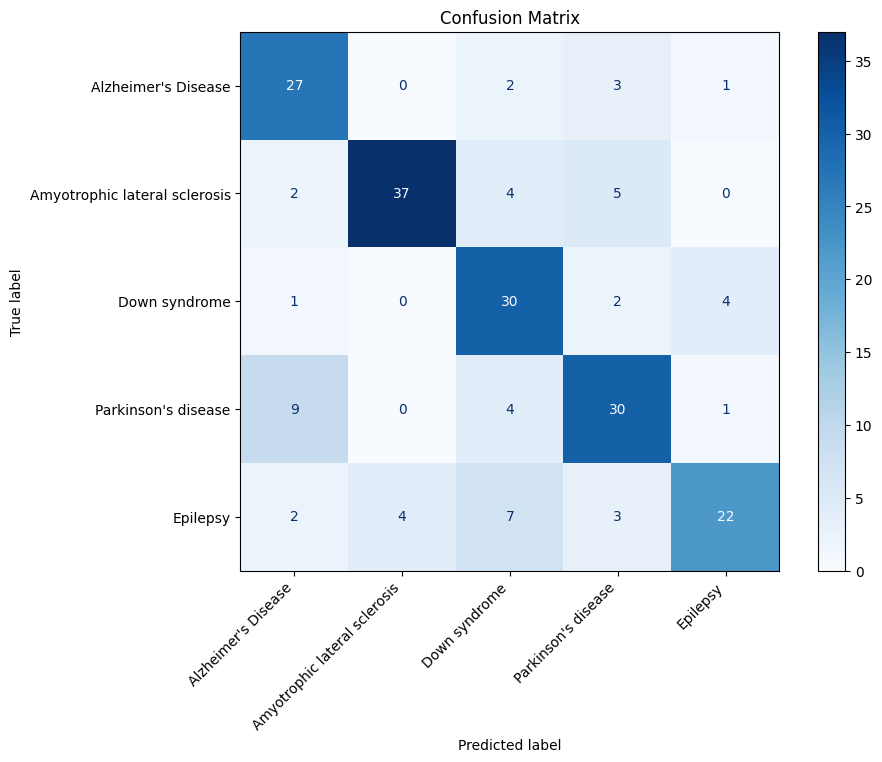

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\Copy of final_merged_embeddings_diaria(1).xlsx")  # Adjust the path to your dataset

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)

# Setup the parameter grid
param_grid = {
    'n_estimators': [100, 124],  
    'criterion': ['gini'],      
    'max_features': ['auto', 'sqrt', 'log2'],  
    'max_depth': [20, 30, 50, 70],  
    'min_samples_split': [2, 5, 10, 15],  
    'min_samples_leaf': [1, 2, 4, 6],     
    'bootstrap': [True]                   
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, Y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best Accuracy score achieved: ", grid_search.best_score_)
Y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)


print("Confusion Matrix:\n", conf_matrix)
labels = Y.unique()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix')
plt.show()


XGBOOST

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Accuracy 0.7425070166051834
Confusion Matrix:
 [[29  0  2  2  0]
 [ 5 38  3  0  2]
 [ 2  0 32  1  2]
 [10  0  5 29  0]
 [ 0  5  6  4 23]]


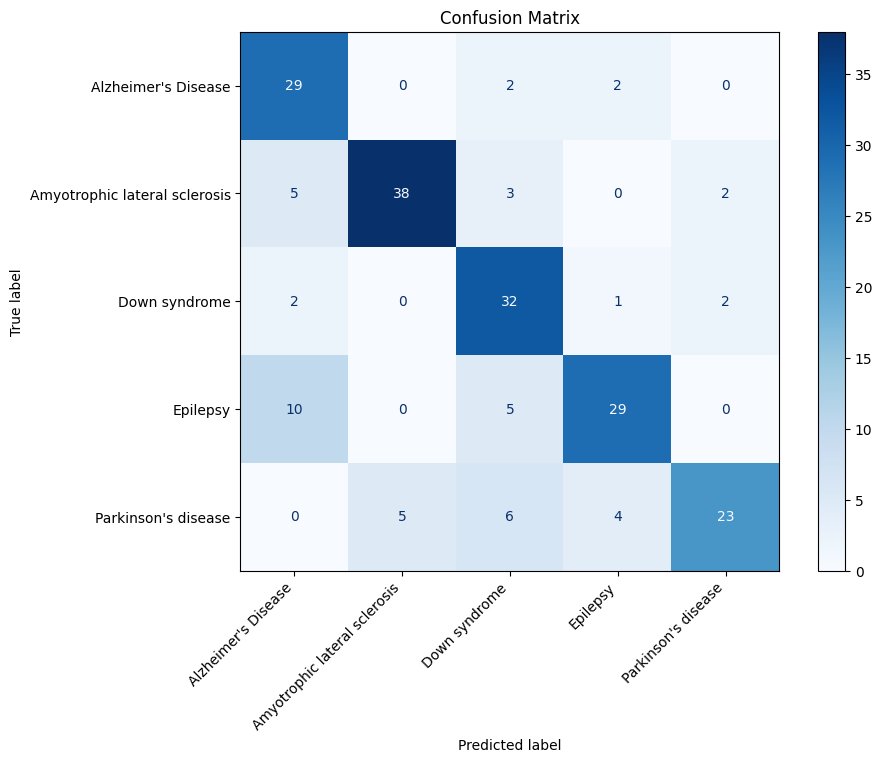

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\Copy of final_merged_embeddings_diaria(1).xlsx")  # Adjust the path to your dataset

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

# Encode the target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y_encoded, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Setup the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)


grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_


Y_pred = best_model.predict(X_test)

# Decode the predictions back to original labels
Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy", grid_search.best_score_)
print("Confusion Matrix:\n", confusion_matrix(Y_test_labels, Y_pred_labels))

# Visualize the confusion matrix
labels = label_encoder.classes_
conf_matrix = confusion_matrix(Y_test_labels, Y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix')
plt.show()


KNN


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\finaldatasett.xlsx")  # Adjust the path to your dataset

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

# Encode the target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],       
    'weights': ['uniform', 'distance'],    
    'p': [1, 2],                           
    'leaf_size': [10, 20, 30, 40, 50]     
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Best model
best_knn = grid_search.best_estimator_
Y_pred = best_knn.predict(X_test)

# Decode the predictions back to original labels
Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print("Confusion Matrix:\n", confusion_matrix(Y_test_labels, Y_pred_labels))



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'leaf_size': 10, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best Accuracy: 0.87575
Confusion Matrix:
 [[149   1  16  14  12]
 [  0 211   2   2   1]
 [  0   0 196   0   0]
 [  0   0   1 205   0]
 [ 16   4  19   6 145]]


SVM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\finaldatasett.xlsx")  # Adjust the path to your dataset

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

# Encode the target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm = SVC()

# Setup the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Specifies the kernel type to be used in the algorithm
    'gamma': ['scale', 'auto']      # Kernel coefficient
}

# Create the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search_svm.fit(X_train, Y_train)
best_svm = grid_search_svm.best_estimator_
Y_pred = best_svm.predict(X_test)
Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the model
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Accuracy:", grid_search_svm.best_score_)
print("Confusion Matrix:\n", confusion_matrix(Y_test_labels, Y_pred_labels))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.877
Confusion Matrix:
 [[168   2  10   6   6]
 [  1 213   0   0   2]
 [  1   0 191   2   2]
 [  2   0  19 183   2]
 [ 16   2  14   2 156]]


CATBOOST

In [43]:
from catboost import CatBoostClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Initialize the CatBoost classifier
cat = CatBoostClassifier(verbose=0)

# Setup the parameter grid
param_grid_cat = {
    'depth': [4, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300]
}

# Create the GridSearchCV object
grid_search_cat = GridSearchCV(cat, param_grid_cat, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search_cat.fit(X_train, Y_train)

# Best model
best_cat = grid_search_cat.best_estimator_

# Use the best estimator to make predictions
Y_pred = best_cat.predict(X_test)

# Decode the predictions back to original labels
Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the model
print("Best Parameters:", grid_search_cat.best_params_)
print("Best Accuracy:", grid_search_cat.best_score_)
print("Confusion Matrix:\n", confusion_matrix(Y_test_labels, Y_pred_labels))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
36 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\catboost\core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, Non

Best Parameters: {'depth': 4, 'iterations': 300, 'learning_rate': 0.1}
Best Accuracy: 0.74
Confusion Matrix:
 [[26  1  2  3  1]
 [ 5 35  4  3  1]
 [ 3  0 33  0  1]
 [ 9  1  5 29  0]
 [ 1  5  7  3 22]]


c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ADABOOST

In [44]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\Copy of final_merged_embeddings_diaria(1).xlsx")

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

# Encode the target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Setup the PCA + AdaBoost pipeline
pipeline_ada = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('ada', AdaBoostClassifier())
])

# Parameter grid for AdaBoost
param_grid_ada = {
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.01, 0.1, 1.0]
}

# Create the GridSearchCV object
grid_search_ada = GridSearchCV(pipeline_ada, param_grid_ada, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search_ada.fit(X_train, Y_train)

# Best model
best_ada = grid_search_ada.best_estimator_

# Use the best estimator to make predictions
Y_pred = best_ada.predict(X_test)

# Decode the predictions back to original labels
Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the model
print("Best Parameters:", grid_search_ada.best_params_)
print("Best Accuracy:", grid_search_ada.best_score_)
print("Confusion Matrix:\n", confusion_matrix(Y_test_labels, Y_pred_labels))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'ada__learning_rate': 1.0, 'ada__n_estimators': 150}
Best Accuracy: 0.48624999999999996
Confusion Matrix:
 [[14  1  1 10  7]
 [14 21  2  7  4]
 [ 0  1 20  5 11]
 [10  2  7 22  3]
 [ 6  2  4 14 12]]


DECISION TREE

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\finaldatasett.xlsx")
# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

# Encode the target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Setup the PCA + Decision Tree pipeline
pipeline_dt = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('dt', DecisionTreeClassifier())
])

# Parameter grid for Decision Tree
param_grid_dt = {
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search_dt.fit(X_train, Y_train)

# Best model
best_dt = grid_search_dt.best_estimator_

# Use the best estimator to make predictions
Y_pred = best_dt.predict(X_test)

# Decode the predictions back to original labels
Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the model
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Accuracy", grid_search_dt.best_score_)
print("Confusion Matrix:\n", confusion_matrix(Y_test_labels, Y_pred_labels))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'dt__max_depth': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Best Accuracy 0.7295
Confusion Matrix:
 [[127  17  14  13  21]
 [ 26 158   3   9  20]
 [ 14   2 174   2   4]
 [  9   7  20 162   8]
 [ 32  18  12   7 121]]


NAIVE BAYES

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\finaldatasett.xlsx")

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

# Encode the target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Setup the PCA + Naive Bayes pipeline
pipeline_nb = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('nb', GaussianNB())
])

# No hyperparameters to tune for GaussianNB in this pipeline, so we use it directly
pipeline_nb.fit(X_train, Y_train)

# Use the pipeline to make predictions
Y_pred = pipeline_nb.predict(X_test)

# Decode the predictions back to original labels
Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test_labels, Y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(Y_test_labels, Y_pred_labels))
print("Classification Report:\n", classification_report(Y_test_labels, Y_pred_labels))

Accuracy: 0.571
Confusion Matrix:
 [[ 75  35  55  12  15]
 [ 16 183   1   5  11]
 [  6   3 175  10   2]
 [ 12  26  81  80   7]
 [ 37  34  53   8  58]]
Classification Report:
                                 precision    recall  f1-score   support

                   Alzheimer's       0.51      0.39      0.44       192
Amyotrophic lateral sclerosis        0.65      0.85      0.74       216
                 Down syndrome       0.48      0.89      0.62       196
           Parkinson's Disease       0.70      0.39      0.50       206
                      epilepsy       0.62      0.31      0.41       190

                      accuracy                           0.57      1000
                     macro avg       0.59      0.56      0.54      1000
                  weighted avg       0.60      0.57      0.55      1000



CNN

Epoch 1/100


c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4216 - loss: 1.6313 - val_accuracy: 0.6662 - val_loss: 0.9132
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6773 - loss: 0.8726 - val_accuracy: 0.7563 - val_loss: 0.6785
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7386 - loss: 0.6930 - val_accuracy: 0.8163 - val_loss: 0.5342
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8114 - loss: 0.5142 - val_accuracy: 0.8400 - val_loss: 0.4914
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8554 - loss: 0.3827 - val_accuracy: 0.8525 - val_loss: 0.4234
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8770 - loss: 0.3364 - val_accuracy: 0.8700 - val_loss: 0.4148
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9011 - loss: 0.2886 - val_accuracy: 0.8838 - val_loss: 0.3938
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9145 - loss: 0.2427 - val_accuracy

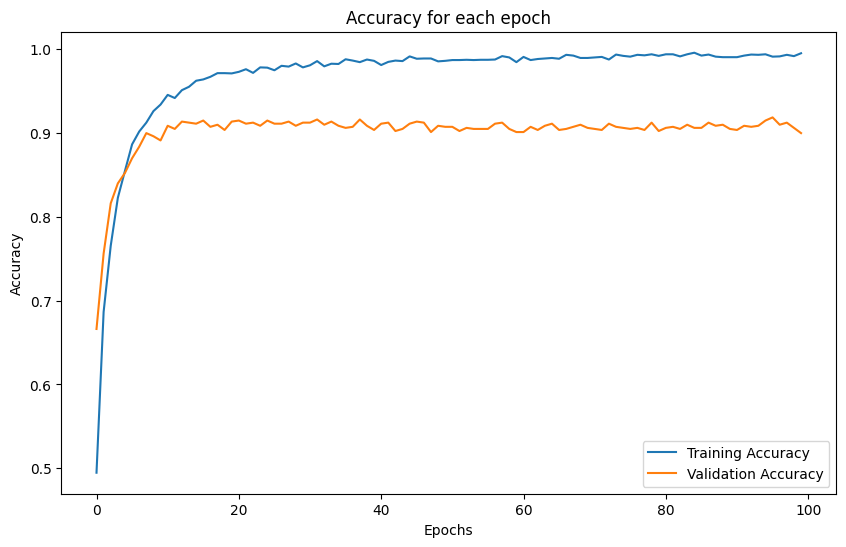

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\finaldatasett.xlsx")  # Adjust the path to your dataset

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

# Encode the target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = np.expand_dims(X_scaled, axis=2)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_scaled.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(Y_encoded)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Decode the predictions back to original labels
Y_pred_labels = label_encoder.inverse_transform(Y_pred_classes)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test_labels, Y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(Y_test_labels, Y_pred_labels))
print("Classification Report:\n", classification_report(Y_test_labels, Y_pred_labels))

# Plot accuracy for each epoch
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for each epoch')
plt.legend()
plt.show()


MLP

In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\Copy of final_merged_embeddings_diaria(1).xlsx")

df.columns = df.columns.astype(str)


X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Setup the PCA + MLP pipeline
pipeline_mlp = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('mlp', MLPClassifier())
])

param_grid = {
    'mlp__hidden_layer_sizes': [(100,), (50, 50), (100, 100)],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__solver': ['lbfgs', 'sgd', 'adam']
}

grid_search = GridSearchCV(pipeline_mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_mlp = grid_search.best_estimator_

Y_pred = best_mlp.predict(X_test)

Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test_labels, Y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(Y_test_labels, Y_pred_labels))
print("Classification Report:\n", classification_report(Y_test_labels, Y_pred_labels))

c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum i

Accuracy: 0.745
Confusion Matrix:
 [[26  3  1  1  2]
 [ 2 38  3  3  2]
 [ 2  0 30  0  5]
 [ 9  1  4 30  0]
 [ 1  3  5  4 25]]
Classification Report:
                                precision    recall  f1-score   support

          Alzheimer's Disease       0.65      0.79      0.71        33
Amyotrophic lateral sclerosis       0.84      0.79      0.82        48
                Down syndrome       0.70      0.81      0.75        37
                     Epilepsy       0.79      0.68      0.73        44
          Parkinson's disease       0.74      0.66      0.69        38

                     accuracy                           0.74       200
                    macro avg       0.74      0.75      0.74       200
                 weighted avg       0.75      0.74      0.75       200



c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ENSEMBLE MODEL(XGBOOST,RANDOM FOREST,SVM) With STACKING CLASSIFIER(using base model as random forest)

Accuracy: 0.77
Confusion Matrix:
 [[28  0  1  2  2]
 [ 0 38  3  4  3]
 [ 1  0 30  1  5]
 [ 8  0  3 32  1]
 [ 0  1  6  5 26]]


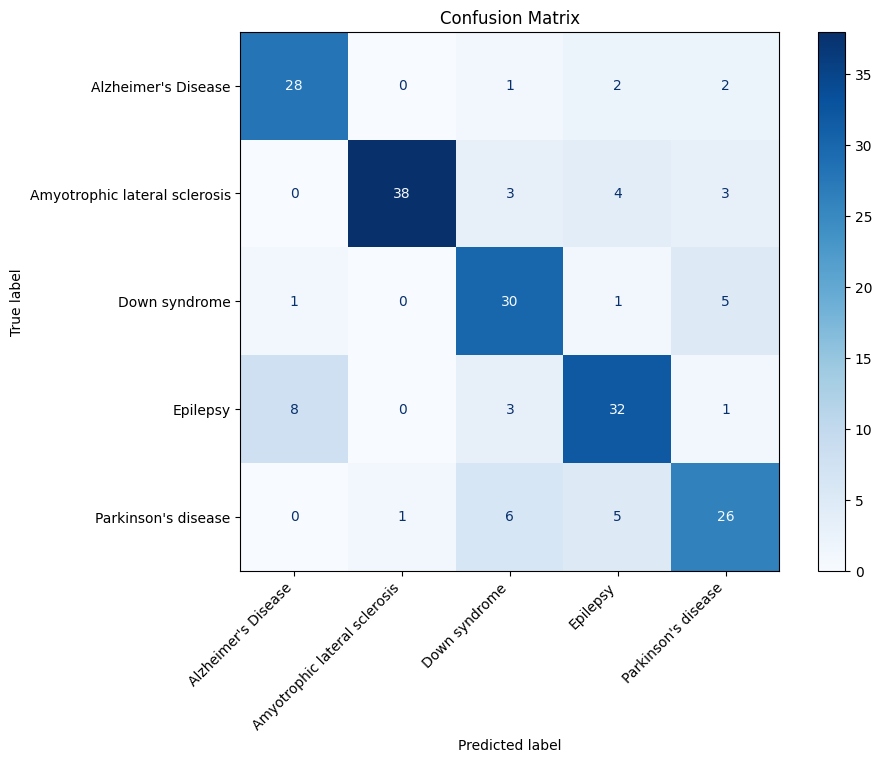

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\Copy of final_merged_embeddings_diaria(1).xlsx")  # Adjust the path to your dataset

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

# Encode the target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Initialize the base classifiers with provided hyperparameters
rf = RandomForestClassifier(random_state=42, n_estimators=124, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features='log2', criterion='gini', bootstrap=True)
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.2, subsample=1.0, colsample_bytree=0.9, use_label_encoder=False, eval_metric='mlogloss')
svm = SVC(C=10, kernel='rbf', gamma='scale', probability=True)

# Create the Stacking Classifier
estimators = [
    ('rf', rf),
    ('xgb', xgb),
    ('svm', svm)
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=100, random_state=42), cv=5)

# Fit the stacking classifier
stacking_clf.fit(X_train, Y_train)

# Make predictions
Y_pred = stacking_clf.predict(X_test)

# Decode the predictions back to original labels
Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test_labels, Y_pred_labels)
conf_matrix = confusion_matrix(Y_test_labels, Y_pred_labels)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
labels = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix')
plt.show()



ENSEMBLE MODEL(XGBOOST,RANDOM FOREST,SVM) With STACKING CLASSIFIER(using base model as SVM)

Accuracy: 0.943
Confusion Matrix:
 [[175   2   5   0  10]
 [  1 213   0   0   2]
 [  2   0 192   0   2]
 [  2   0   2 199   3]
 [ 20   1   5   0 164]]


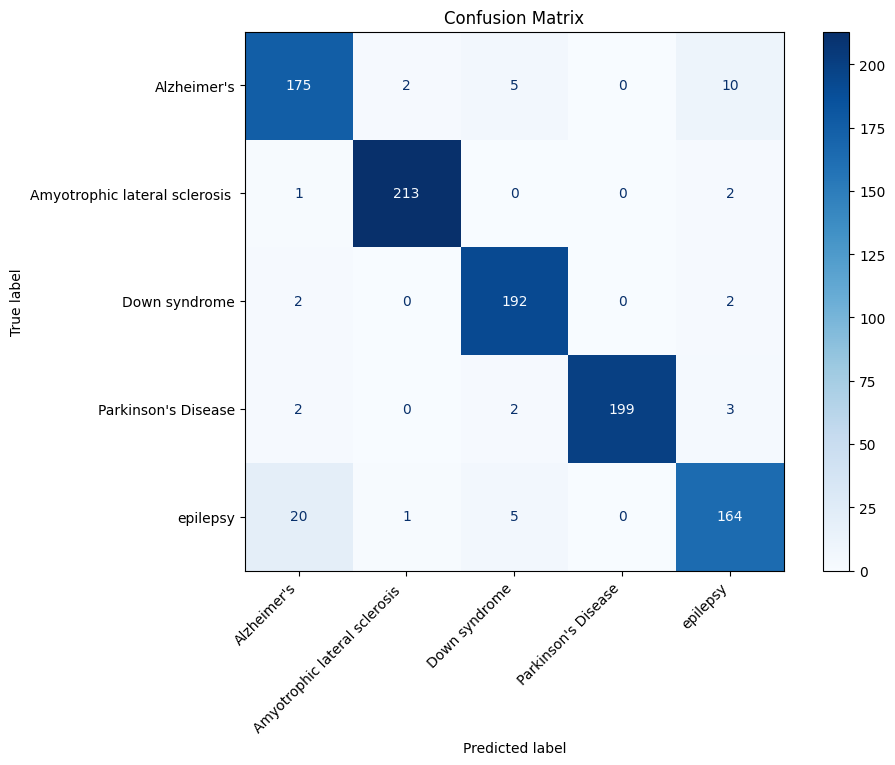

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\finaldatasett.xlsx")  # Adjust the path to your dataset

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

# Encode the target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Initialize the base classifiers with provided hyperparameters
rf = RandomForestClassifier(random_state=42, n_estimators=124, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features='log2', criterion='gini', bootstrap=True)
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.2, subsample=1.0, colsample_bytree=0.9, use_label_encoder=False, eval_metric='mlogloss')
svm = SVC(C=10, kernel='rbf', gamma='scale', probability=True)

# Create the Stacking Classifier with SVM as the final estimator
stacking_clf = StackingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('svm', svm)
], final_estimator=SVC(C=1, kernel='linear', probability=True))

# Fit the stacking classifier
stacking_clf.fit(X_train, Y_train)

# Make predictions
Y_pred = stacking_clf.predict(X_test)

# Decode the predictions back to original labels
Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test_labels, Y_pred_labels)
conf_matrix = confusion_matrix(Y_test_labels, Y_pred_labels)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
labels = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix')
plt.show()


ENSEMBLE MODEL(XGBOOST,RANDOM FOREST,SVM) With VOTING CLASSIFIER

Accuracy: 0.914
Confusion Matrix:
 [[163   3   9   2  15]
 [  1 212   0   0   3]
 [  2   0 190   1   3]
 [  2   1  10 189   4]
 [ 23   2   5   0 160]]


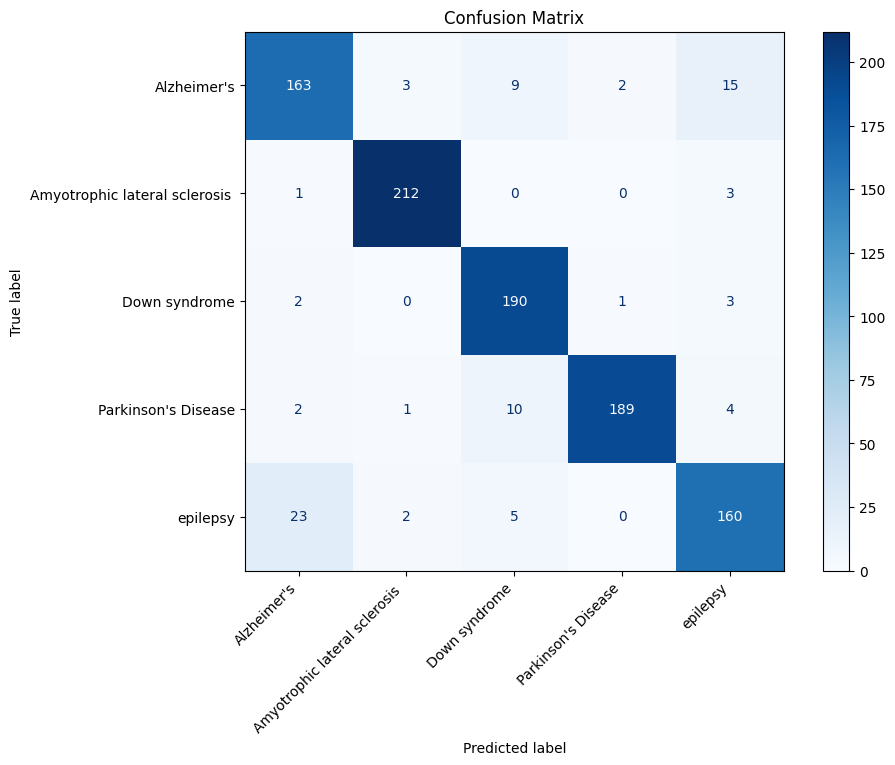

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("C:\\Users\\V R N S Nikhil\\Downloads\\finaldatasett.xlsx")  # Adjust the path to your dataset

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Prepare the data
X = df.drop('Disease_Name', axis=1)
Y = df['Disease_Name']

# Encode the target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y_encoded, test_size=0.2, random_state=42)

# Initialize the base classifiers with provided hyperparameters
rf = RandomForestClassifier(random_state=42, n_estimators=124, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features='log2', criterion='gini', bootstrap=True)
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.2, subsample=1.0, colsample_bytree=0.9, use_label_encoder=False, eval_metric='mlogloss')
svm = SVC(C=10, kernel='rbf', gamma='scale', probability=True)

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('svm', svm)
], voting='soft')  # Use 'soft' voting to average the probabilities

# Fit the voting classifier
voting_clf.fit(X_train, Y_train)

# Make predictions
Y_pred = voting_clf.predict(X_test)

# Decode the predictions back to original labels
Y_pred_labels = label_encoder.inverse_transform(Y_pred)
Y_test_labels = label_encoder.inverse_transform(Y_test)

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test_labels, Y_pred_labels)
conf_matrix = confusion_matrix(Y_test_labels, Y_pred_labels)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
labels = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix')
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Load the Excel file
file_path = "C:\\Users\\V R N S Nikhil\\Downloads\\finaldatasett.xlsx"
data = pd.read_excel(file_path)

# Extract features and target
X = data.filter(like='Embedding')
y = data['Disease_Name']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_)

print("XGBoost Model")
print(f"Accuracy: {accuracy_xgb}")
print("Classification Report:")
print(classification_report_xgb)

# Train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set with RandomForest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the RandomForest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)

print("\nRandomForest Model")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(classification_report_rf)

XGBoost Model
Accuracy: 0.925
Classification Report:
                                precision    recall  f1-score   support

                   Alzheimer's       0.84      0.88      0.86       192
Amyotrophic lateral sclerosis        0.95      0.97      0.96       216
                 Down syndrome       0.91      0.98      0.95       196
           Parkinson's Disease       0.99      0.98      0.98       206
                      epilepsy       0.92      0.81      0.86       190

                      accuracy                           0.93      1000
                     macro avg       0.92      0.92      0.92      1000
                  weighted avg       0.93      0.93      0.92      1000


RandomForest Model
Accuracy: 0.913
Classification Report:
                                precision    recall  f1-score   support

                   Alzheimer's       0.86      0.84      0.85       192
Amyotrophic lateral sclerosis        0.91      0.99      0.95       216
                 Dow